<a href="https://colab.research.google.com/github/idhamari/differential_privacy_tutorials/blob/main/ia_DP_Visual_Explaination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A visual explaination to differential priavcy

Assuming we have this standard image of Lena.

['.config', 'lena.png', 'sample_data']


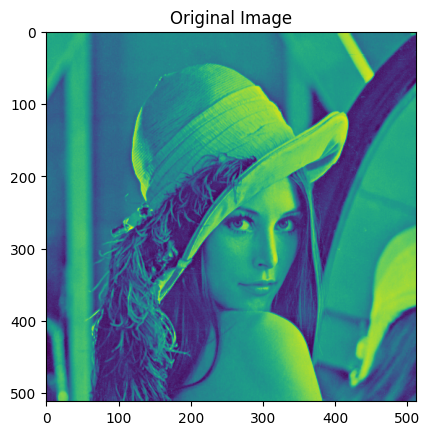

In [19]:
# Simple image

from matplotlib import pyplot as plt
import os, cv2

os.system('wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" -O lena.png')

fnms = os.listdir(".")
print (fnms)
fnm = "lena.png"
#img = cv2.cvtColor(cv2.imread(fnm), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(cv2.imread(fnm), cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.title('Original Image')
plt.show()

By adding small noise to each pixel in the image, individual pixels values are not the same anymore. However, the image does not change that much. One can think of pixel values as sensitive individual information that we like to keep private. Try to experment with the noise noise_level


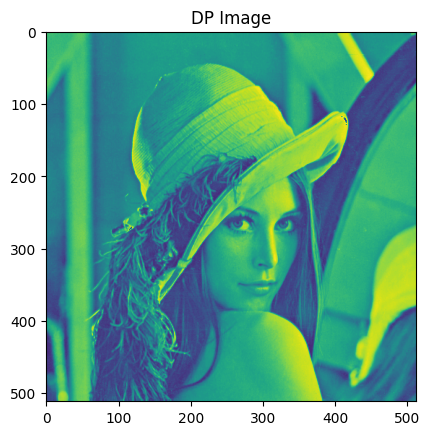

n [i j k] original DP Difference
0 [ 37 202 0 ] 127 139 12.0
1 [ 225 206 0 ] 58 63 5.0
2 [ 420 472 0 ] 73 80 7.0
3 [ 153 217 0 ] 160 176 16.0
4 [ 241 96 0 ] 106 116 10.0


In [21]:
from matplotlib import pyplot as plt
import numpy as np
import os, cv2, random

noise_level = 0.10
os.system('wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" -O lena.png')
#img = cv2.cvtColor(cv2.imread("lena.png"), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(cv2.imread("lena.png"), cv2.COLOR_BGR2GRAY)

def sp_noise(img,noise_level):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    # output = np.zeros(img.shape,np.uint8)
    # for i in range(img.shape[0]):
    #     for j in range(img.shape[1]):
    #        for k in range(img.shape[2]):
    #             #noise_level = random.randrange(50)
    #             output[i][j][k] = img[i][j][k] + noise_level * img[i][j][k]
    output = np.uint8(img.astype(float) + noise_level * img.astype(float))
    return output

dp_image = sp_noise(img,noise_level)
plt.imshow(dp_image)
plt.title('DP Image')
plt.show()

# get n random pixels and comapre the values
N = 5
print("n", "[i j k]", "original","DP", "Difference")
for n in range(N):
    i = random.randint(0, img.shape[0] - 1)
    j = random.randint(0, img.shape[1] - 1)
#    k = random.randint(0, img.shape[2] - 1)
    pixel_value    = img[i][j]#[k]
    dp_pixel_value = dp_image[i][j]#[k]
    difference     = abs(float(pixel_value) - float(dp_pixel_value))
    print(n, "[", i, j, k, "]", pixel_value, dp_pixel_value, difference)
